In [3]:
%matplotlib inline
from preamble import *
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

# 波士顿房价数据

In [4]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 岭回归

In [5]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Ridge training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge test set score: {ridge.score(X_test, y_test):.2f}")

Ridge training set score: 0.93
Ridge test set score: 0.77


# Lasso

In [6]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Lasso training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso test set score: {lasso.score(X_test, y_test):.2f}")
# print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Lasso training set score: 0.90
Lasso test set score: 0.77


# ElastiNet

In [7]:
from sklearn.linear_model import ElasticNet
elastinet = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=1000).fit(X_train, y_train)
print(f"ElasticNet training set score: {elastinet.score(X_train, y_train):.2f}")
print(f"ElasticNet test set score: {elastinet.score(X_test, y_test):.2f}")

ElasticNet training set score: 0.92
ElasticNet test set score: 0.78


# 对比

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=0))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)

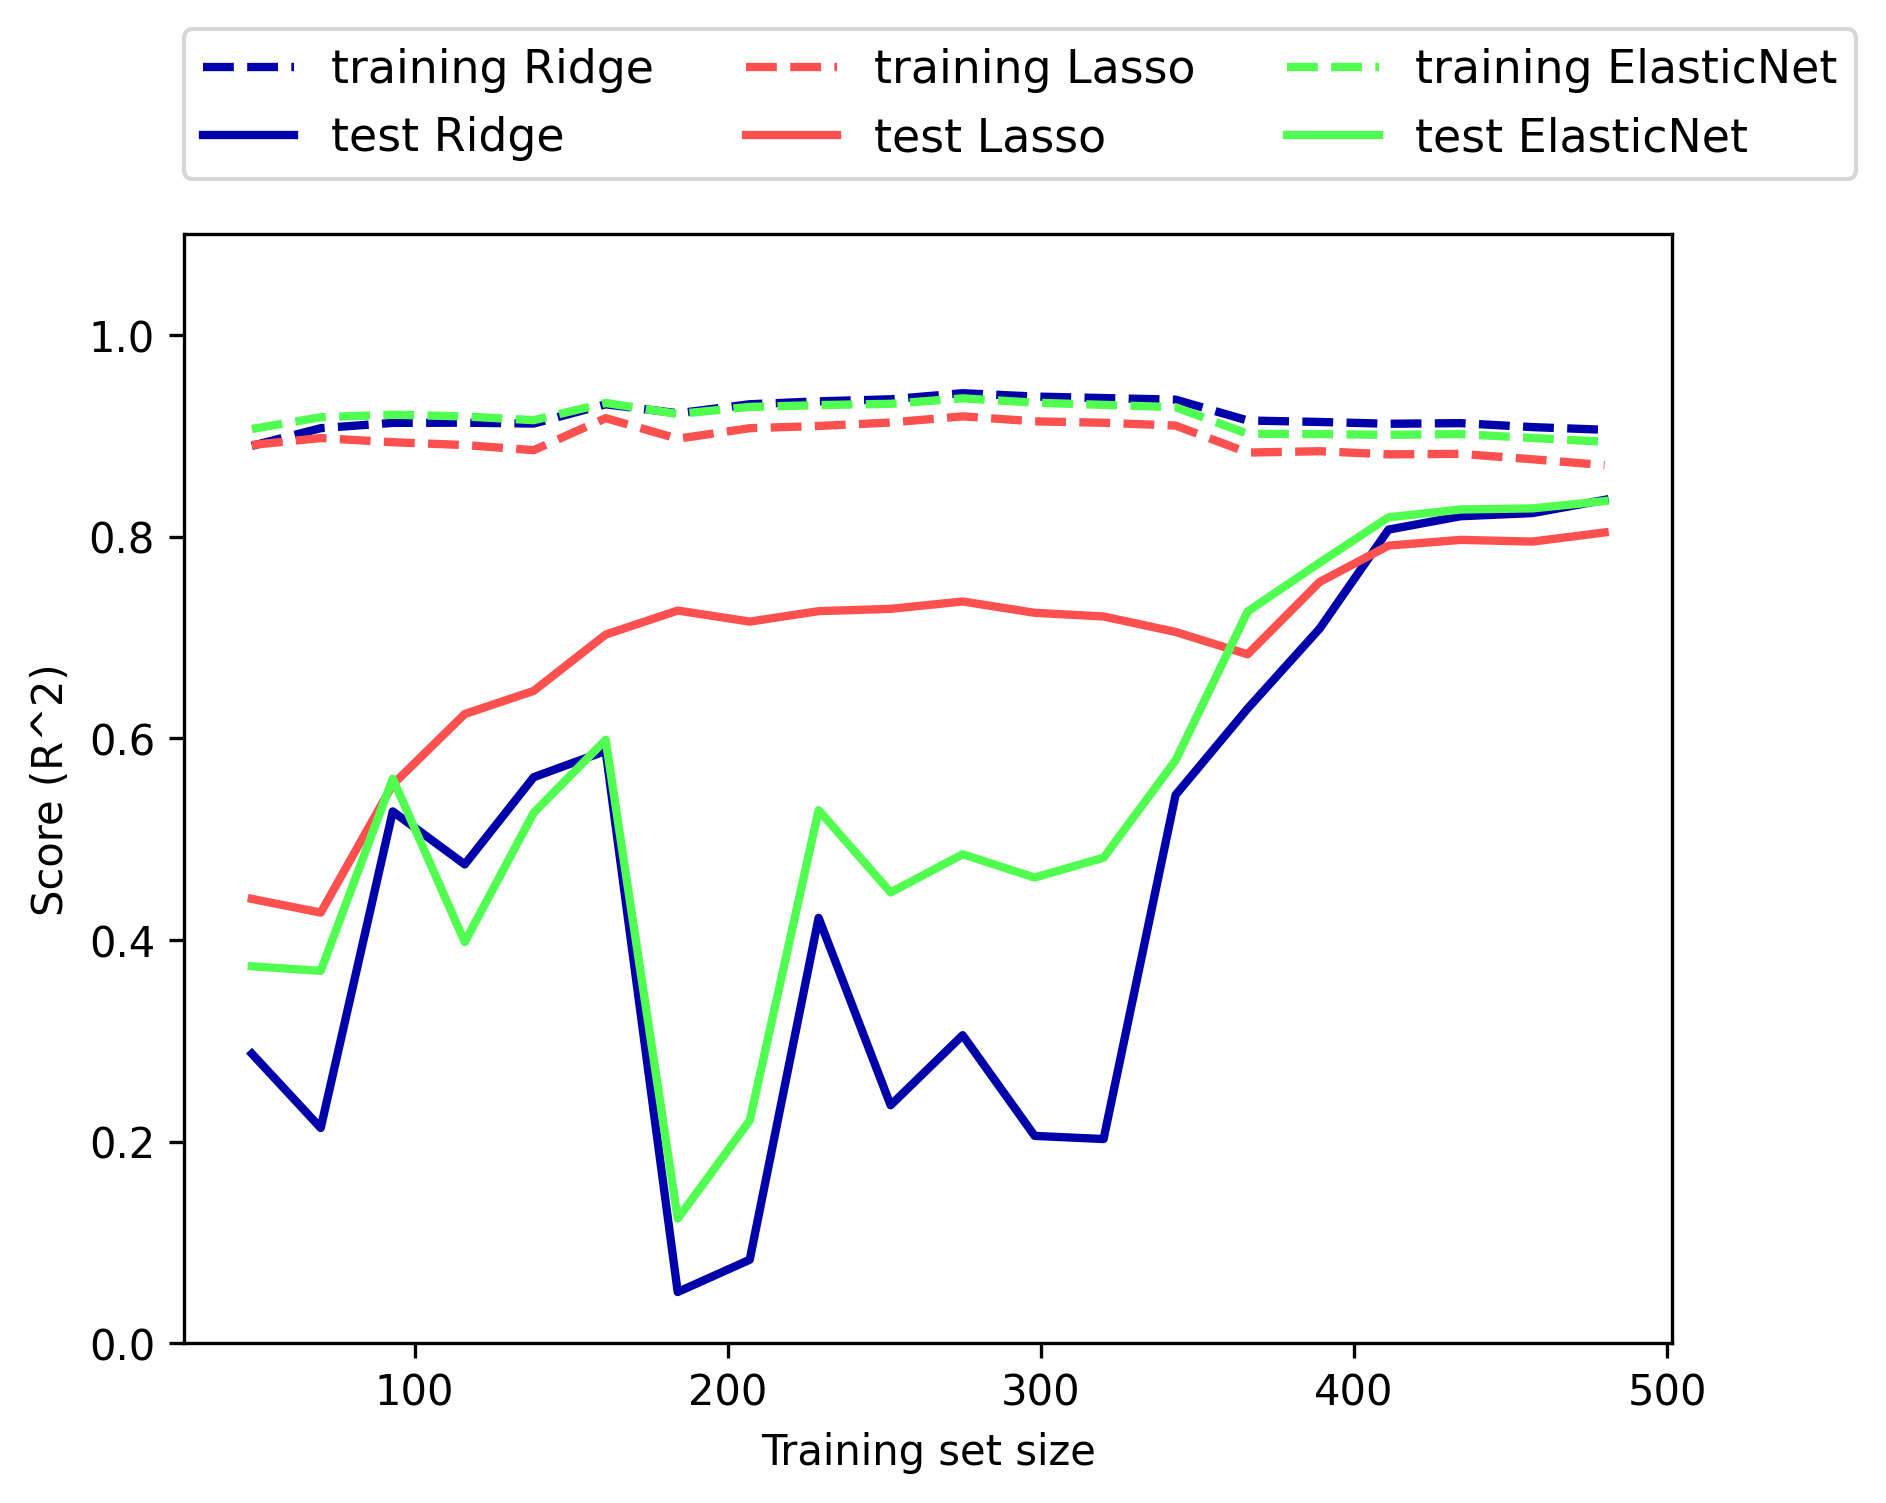

In [9]:
plot_learning_curve(Ridge(alpha=0.1), X, y)
plot_learning_curve(Lasso(alpha=0.01, max_iter=100000), X, y)
plot_learning_curve(ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=1000), X, y)
plt.legend(loc=(0, 1.05), ncol=3, fontsize=11)